In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

file_path = 'data/imdb_top_1000.csv'

df_raw = pd.read_csv(file_path)

#print(df_raw['Certificate'].unique())

rating_age_map = {
    'A': 18, 'U': 0, 'UA': 7, 'U/A': 7, 'PG': 8, 'PG-13': 13, 'R': 17, 'G': 0, 'Passed': 0, 'Approved': 0, 
    'GP': 10, 'TV-14': 14, 'TV-MA': 17, 'TV-PG': 10, '16': 16, 'Unrated': None, 'NaN': None       
}
df_raw['Certificate'] = df_raw['Certificate'].map(rating_age_map)

df_raw['Runtime'] = df_raw['Runtime'].str.extract('(\d+)').astype(int)
df_raw['Genre'] = df_raw['Genre'].str.split(', ')

tfidf = TfidfVectorizer(stop_words='english')
df_raw['overview_tfidf'] = list(tfidf.fit_transform(df_raw['Overview']).toarray())

encoder = OneHotEncoder()
directors_encoded = encoder.fit_transform(df_raw[['Director']])

print(directors_encoded)

# df_raw

  (0, 141)	1.0
  (1, 137)	1.0
  (2, 83)	1.0
  (3, 137)	1.0
  (4, 456)	1.0
  (5, 383)	1.0
  (6, 391)	1.0
  (7, 470)	1.0
  (8, 83)	1.0
  (9, 100)	1.0
  (10, 383)	1.0
  (11, 426)	1.0
  (12, 449)	1.0
  (13, 383)	1.0
  (14, 284)	1.0
  (15, 313)	1.0
  (16, 191)	1.0
  (17, 342)	1.0
  (18, 492)	1.0
  (19, 56)	1.0
  (20, 472)	1.0
  (21, 83)	1.0
  (22, 135)	1.0
  (23, 179)	1.0
  (24, 470)	1.0
  :	:
  (975, 413)	1.0
  (976, 432)	1.0
  (977, 108)	1.0
  (978, 240)	1.0
  (979, 405)	1.0
  (980, 231)	1.0
  (981, 308)	1.0
  (982, 159)	1.0
  (983, 521)	1.0
  (984, 204)	1.0
  (985, 115)	1.0
  (986, 312)	1.0
  (987, 12)	1.0
  (988, 470)	1.0
  (989, 415)	1.0
  (990, 449)	1.0
  (991, 61)	1.0
  (992, 531)	1.0
  (993, 336)	1.0
  (994, 407)	1.0
  (995, 50)	1.0
  (996, 164)	1.0
  (997, 145)	1.0
  (998, 22)	1.0
  (999, 22)	1.0


<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
/var/folders/sp/l3wh46n10l9452c7cz0863q40000gn/T/ipykernel_28718/3279413020.py:17: SyntaxWarning: invalid escape sequence '\d'
  df_raw['Runtime'] = df_raw['Runtime'].str.extract('(\d+)').astype(int)


In [60]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Example function to calculate similarity
def calculate_similarity(df, index):
    similarities = {}
    target = df.iloc[index]
    for i, row in df.iterrows():
        if i != index:
            sim_score = 0
            # Combine weighted scores from different features
            sim_score += cosine_similarity([target['overview_tfidf']], [row['overview_tfidf']])[0][0]
            # Add other similarities, weighted appropriately
            similarities[row['Series_Title']] = sim_score
    return sorted(similarities.items(), key=lambda x: x[1], reverse=True)

def recommend_movies(title, top_n=10):
    index = df_raw[df_raw['Series_Title'] == title].index[0]
    recommendations = calculate_similarity(df_raw, index)
    return recommendations[:top_n]

# Filter the DataFrame for 'The Dark Knight' and then access 'overview_tfidf'
overview_tfidf = df_raw[df_raw['Series_Title'] == 'The Dark Knight'].index[0]
targ = df_raw.iloc[2]
targ_mat = targ["overview_tfidf"]
#print(targ["overview_tfidf"])
print(cosine_similarity([targ_mat],[targ_mat]))

print

[[1.]]


In [ ]:
recommend_movies('The Dark Knight')

[('Batman Begins', 0.2044888658657493),
 ('The Dark Knight Rises', 0.17761258251614476),
 ('Joker', 0.09853672377205022),
 ('Kill Bill: Vol. 1', 0.09273886468830327),
 ('La battaglia di Algeri', 0.08940649780155555),
 ('The Hurricane', 0.08039428178468234),
 ('Mulan', 0.07745579884006172),
 ('Wreck-It Ralph', 0.07729067757141043),
 ('Batman: Mask of the Phantasm', 0.07450408360309729),
 ('Jaws', 0.07192009751558805)]

In [ ]:
recommend_movies('The Hurricane')

[('Who Framed Roger Rabbit', 0.24458366976571683),
 ('Män som hatar kvinnor', 0.1144426989514485),
 ('Miracle in cell NO.7', 0.1129958398425462),
 ('La battaglia di Algeri', 0.11259850751046145),
 ('Cinderella Man', 0.10960241426495723),
 ('Young Frankenstein', 0.10910904987974013),
 ('Rocky', 0.10778979948306887),
 ('Key Largo', 0.10017944076547909),
 ('Batman: Mask of the Phantasm', 0.09383041303959276),
 ('The Fighter', 0.09057468108755788)]

{'Drama': 724, 'Crime': 209, 'Action': 189, 'Adventure': 196, 'Biography': 109, 'History': 56, 'Sci-Fi': 67, 'Romance': 125, 'Western': 20, 'Fantasy': 66, 'Comedy': 233, 'Thriller': 137, 'Animation': 82, 'Family': 56, 'War': 51, 'Mystery': 99, 'Music': 35, 'Horror': 32, 'Musical': 17, 'Film-Noir': 19, 'Sport': 19}


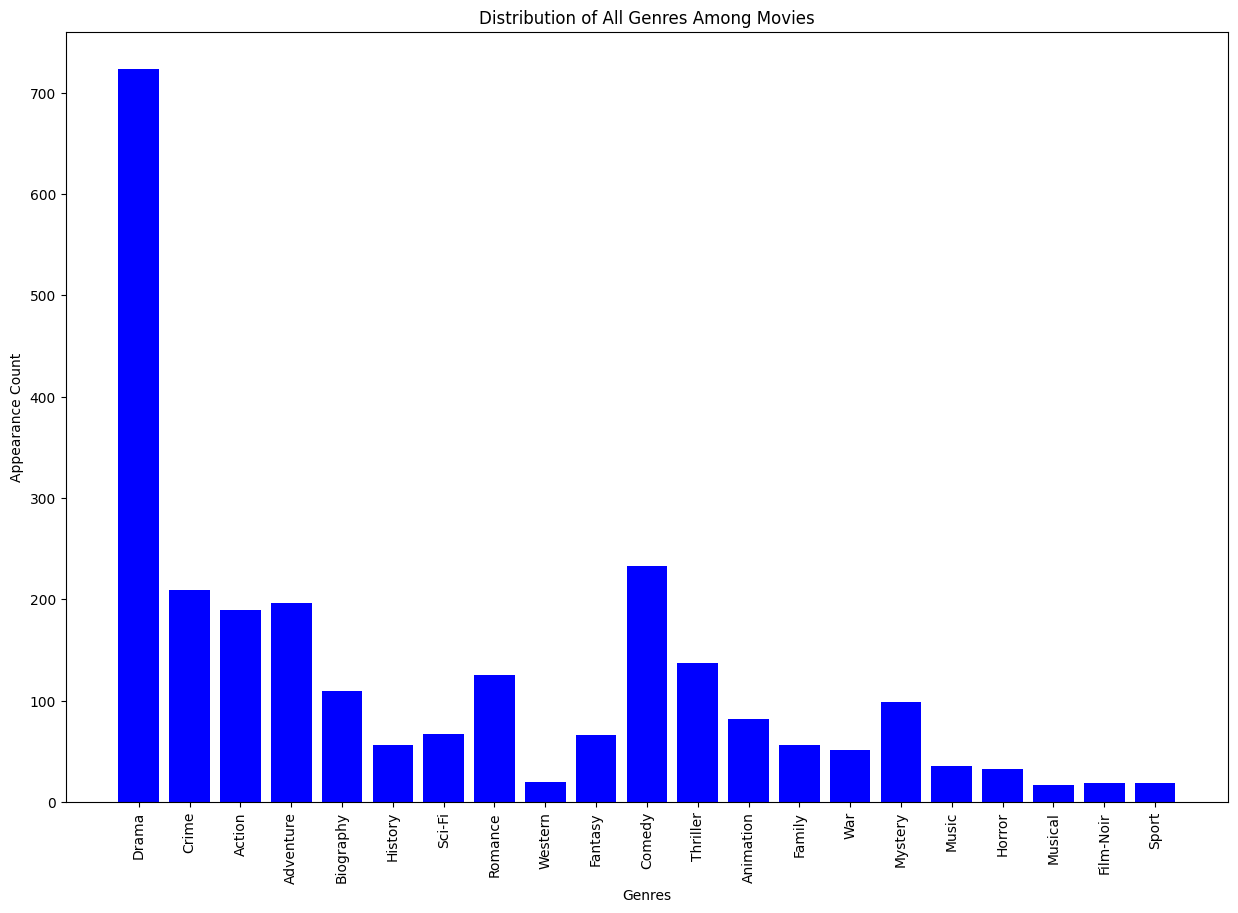

In [ ]:
import matplotlib.pyplot as plt

df_genres = df_raw['Genre'].tolist()
genres_dict = {}
for lst in df_genres:
    for genre in lst:
        genres_dict[genre] = 1 + genres_dict.get(genre, 0)
print(genres_dict)

# Creating lists of keys and values from the dictionary
categories = list(genres_dict.keys())
values = list(genres_dict.values())

# Creating the bar graph
plt.figure(figsize=(15, 10))  # Set the size of the figure (optional)
plt.bar(categories, values, color='blue')  # Create bar plot

# Adding titles and labels
plt.title('Distribution of All Genres Among Movies')
plt.xlabel('Genres')
plt.xticks(rotation=90)
plt.ylabel('Appearance Count')


# Show the plot
plt.show()


Our graph demonstrates that there are an overall more apperanace of the drama category in our genre. Can maybe try the concept of weighted genres


In [ ]:
# sales_by_decade = df_raw.groupby('Genre')['IMDB_Rating'].sum()
# print(sales_by_decade)

# # Genre appereaces in each movie
# # IMDB Rating 
# # Graphs with multiple variable
# # Trying to find correlations 
# # Scatter plots - two or three variable scatterplots
# # Four variable one - Budget, Year Release (Two), Decade
# # Two Axes, Color, and Size
# #IMDB Ratings vs Metric Scores

cosine_similarity("Aldo", "Aldo")

InvalidParameterError: The 'X' parameter of cosine_similarity must be an array-like or a sparse matrix. Got 'Aldo' instead.

In [61]:
from scipy.spatial import distance

# Calculate Euclidean distance between two movies
dist = distance.euclidean(4, 10)

ValueError: Input vector should be 1-D.

Ok here is what I think:

- We make a recommendation based #1- the similarities between descriptions, #2- movie ratings (imdb rating? - only consider highest ranked) #3 genres (does the movie have same genres?) (full/partial/etc?) #4-  casts/directions ( include that?)
- maybe we can start looking at just the description and ratings.
- follow up with the genres
- and then look at the catss


Here are my findings:

- There are different type of encoders we can utilize to compare different forms of data
- We will utilize  encoders.transform and np.dot to compare to see if the movies share a genre 
- Ok so for the ratings, we can look at the cosine similarity or euclidian distance
- I am also seeing that you can use top ratings - maybe do we wanna check t
- Gros


Description
IMDB - similarity 
Genre 
Gross Revenue

IMDB and Year, MetaScore, Runtime, Scale the differences, between 0 and 1. Similarity. 
- Similarity Percent - movie with the fartherst . ranges percent. Percents - multipl